In HU, the distance is given by
$d(z) = R_0 \frac{z}{(1+z)}$

the 4D radius is given by:
$R(z) = R_0 \frac{1}{(1+z)}$

where $R_0$ = 14.01 GLY
$G(t) = G_0\frac{R_0}{R(z)}$

$G = G_0 (1+z)$

Using Newtonian Dynamics while reversing time (having the average galaxy moving back in time and through the 4D spatial manifold), we get:
$G(z)\frac{M}{r(z)^2} = \frac{v(z)^2}{r(z)}$

r(z)=$G(z)\frac{M}{v(z)^2}=G_0 (1+z)\frac{M}{v(z)^2}$

Since the angular size of a galaxy is roughly r(z)/d(z)

AngularSize= $G_0 (1+z)\frac{M}{v(z)^2}/(R_0\frac{z}{(1+z)})= \frac{G_0M(1+z)^2}{R_0  z v(z)^2} \propto \frac{1}{z}$

This means that v(z) =$ v_0(1+z)$ which implies that $r(z) = r_0/(1+z)$

where $R_0$ is the current 4D radius (14.01 GLY), and $v_0$ is the current tangential velocity of a body in orbit.

So, as G varies, the radius of the orbits varies, and velocity adjusts to keep angular momentum constant. The resulting angular size z-dependency is $\frac{1}{z} $as depicted in Kapahi’s data.

**NOTICE THAT THIS IS NOT A SMALL RESULT. I DERIVED THE Z-DEPENDENCY OF THE ANGULAR SIZE (AN OBSERVABLE) IN AN EPOCH-DEPENDENT G. THIS HAS NEVER BEEN DONE, AND IT SUPPORTS MY THEORY AND DEBUNKS GENERAL RELATIVITY.**

**JWST'S OBSERVATION OF HUGE GALAXIES IS THE RESULT OF INCORRECT GALAXY SIZE PREDICTIONS AND DISTRIBUTION DUE TO RIEMMANIAN GEOMETRY: NO IFS OR BUTS.**


In [22]:
import matplotlib
# matplotlib.use('TkAgg')  # Use the TkAgg backend (or another appropriate one)
import matplotlib.pyplot as plt
import numpy as np
import math
import xarray as xr
import pandas as pd
from hugalaxy import GalaxyWrapper, plotRotationCurve, calculate_density_parameters, move_rotation_curve
from timeit import default_timer as timer
import jupyter_to_medium as medium


import ipywidgets as widgets
from timeit import default_timer as timer
from IPython.display import display, HTML
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection
from matplotlib.animation import FuncAnimation
import astropy.constants as cc
M_sun = cc.M_sun
M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.988409870698051e+30 uncertainty=4.468805426856864e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>

Compute Choice GPU_Torch_Chunks


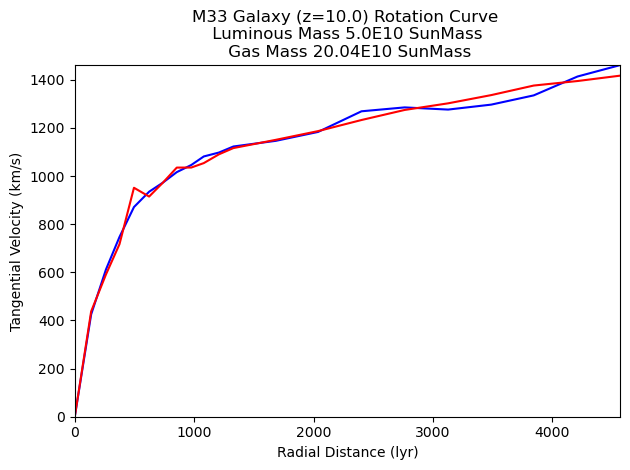

In [24]:
####################################################
# MODELING M33 GALAXY
####################################################

m33_rotational_curve = np.array( [
    [0.0, 0.0],
    [1508.7187, 38.674137],
    [2873.3889, 55.65067],
    [4116.755, 67.91063],
    [5451.099, 79.22689],
    [6846.0957, 85.01734],
    [8089.462, 88.38242],
    [9393.48, 92.42116],
    [10727.824, 95.11208],
    [11880.212, 98.342697],
    [13275.208, 99.82048],
    [14609.553, 102.10709],
    [18521.607, 104.25024],
    [22403.336, 107.60643],
    [26406.369, 115.40966],
    [30379.076, 116.87875],
    [34382.107, 116.05664],
    [38354.813, 117.93005],
    [42266.87, 121.42091],
    [46300.227, 128.55017],
    [50212.285, 132.84966]
])

M33_Distance = 3.2E6
Radius_Universe_4D = 14.03E9
redshift0 = M33_Distance / (Radius_Universe_4D - M33_Distance)
redshift = 10
nr = 160
# NZ should always be ODD
nz = 101
ntheta = 180
R_max = 50000.0

rho_0, alpha_0, rho_1, alpha_1, h0 = calculate_density_parameters(redshift)
GalaxyMass = 5E10
# Create The Galaxy
M33 = GalaxyWrapper(GalaxyMass, rho_0, alpha_0, rho_1, alpha_1, h0, R_max, nr,
                    nz, ntheta, redshift,GPU_ID=0, cuda=True, taskflow=True)
new_m33_rotational_curve = move_rotation_curve(m33_rotational_curve, redshift0, redshift)
M33.read_galaxy_rotation_curve(new_m33_rotational_curve)
M33.rho = M33.density_wrapper_internal()
M33.v_simulated_points = M33.calculate_rotation_velocity_internal()
M33.simulate_rotation_curve()
plotRotationCurve(M33, redshift)

In [26]:
eta = 1E-2
temperature =7
current_time = 14E9/(1+M33.redshift)
time_step_years = 50E3
n_epochs = 60
final_time = n_epochs * time_step_years
epochs = np.geomspace(current_time, final_time, n_epochs)
redshifts = pd.DataFrame(14.1E9/epochs -1)
filename_base = "./data/"
M33.FreeFallGalaxyFormation(epochs,filename_base)

RuntimeError: CUDA out of memory. Tried to allocate 3.47 GiB. GPU 0 has a total capacity of 11.65 GiB of which 402.12 MiB is free. Including non-PyTorch memory, this process has 10.56 GiB memory in use. Of the allocated memory 10.44 GiB is allocated by PyTorch, and 5.10 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
Exception raised from malloc at /opt/conda/conda-bld/pytorch_1729647348947/work/c10/cuda/CUDACachingAllocator.cpp:1318 (most recent call first):
frame #0: c10::Error::Error(c10::SourceLocation, std::string) + 0x96 (0x78545e08a446 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libc10.so)
frame #1: <unknown function> + 0x3ac15 (0x78545d98fc15 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libc10_cuda.so)
frame #2: <unknown function> + 0x3afc7 (0x78545d98ffc7 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libc10_cuda.so)
frame #3: <unknown function> + 0x3b407 (0x78545d990407 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libc10_cuda.so)
frame #4: <unknown function> + 0x15608a9 (0x7854513608a9 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cpu.so)
frame #5: at::detail::empty_generic(c10::ArrayRef<long>, c10::Allocator*, c10::DispatchKeySet, c10::ScalarType, std::optional<c10::MemoryFormat>) + 0x14 (0x78545135b994 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cpu.so)
frame #6: at::detail::empty_cuda(c10::ArrayRef<long>, c10::ScalarType, std::optional<c10::Device>, std::optional<c10::MemoryFormat>) + 0x111 (0x78540d689991 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cuda.so)
frame #7: at::detail::empty_cuda(c10::ArrayRef<long>, std::optional<c10::ScalarType>, std::optional<c10::Layout>, std::optional<c10::Device>, std::optional<bool>, std::optional<c10::MemoryFormat>) + 0x36 (0x78540d689c66 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cuda.so)
frame #8: at::detail::empty_cuda(c10::ArrayRef<long>, c10::TensorOptions const&) + 0xe8 (0x78540d689da8 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cuda.so)
frame #9: <unknown function> + 0x345bdbb (0x78540fa5bdbb in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cuda.so)
frame #10: <unknown function> + 0x3584756 (0x78540fb84756 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cuda.so)
frame #11: at::TensorIteratorBase::allocate_or_resize_outputs() + 0x1f4 (0x785451412864 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cpu.so)
frame #12: at::TensorIteratorBase::build(at::TensorIteratorConfig&) + 0x143 (0x785451415d53 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cpu.so)
frame #13: at::TensorIteratorBase::build_borrowing_binary_op(at::TensorBase const&, at::TensorBase const&, at::TensorBase const&) + 0xe9 (0x785451416e19 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cpu.so)
frame #14: <unknown function> + 0x35225f2 (0x78540fb225f2 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cuda.so)
frame #15: <unknown function> + 0x35226a0 (0x78540fb226a0 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cuda.so)
frame #16: at::_ops::mul_Tensor::redispatch(c10::DispatchKeySet, at::Tensor const&, at::Tensor const&) + 0x6e (0x78545201a85e in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cpu.so)
frame #17: <unknown function> + 0x4749d2e (0x785454549d2e in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cpu.so)
frame #18: <unknown function> + 0x474a443 (0x78545454a443 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cpu.so)
frame #19: at::_ops::mul_Tensor::call(at::Tensor const&, at::Tensor const&) + 0x15e (0x78545207c7fe in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/torch/lib/libtorch_cpu.so)
frame #20: <unknown function> + 0x4c560 (0x78545e16b560 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/hugalaxy/hugalaxy.cpython-311-x86_64-linux-gnu.so)
frame #21: <unknown function> + 0x53fd7 (0x78545e172fd7 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/hugalaxy/hugalaxy.cpython-311-x86_64-linux-gnu.so)
frame #22: <unknown function> + 0x45394 (0x78545e164394 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/hugalaxy/hugalaxy.cpython-311-x86_64-linux-gnu.so)
frame #23: <unknown function> + 0x31da7 (0x78545e150da7 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/hugalaxy/hugalaxy.cpython-311-x86_64-linux-gnu.so)
frame #24: <unknown function> + 0x3ba9e (0x78545e15aa9e in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/hugalaxy/hugalaxy.cpython-311-x86_64-linux-gnu.so)
frame #25: <unknown function> + 0x287d4 (0x78545e1477d4 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/site-packages/hugalaxy/hugalaxy.cpython-311-x86_64-linux-gnu.so)
frame #26: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x528a57]
frame #27: _PyObject_MakeTpCall + 0x26c (0x50451c in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #28: _PyEval_EvalFrameDefault + 0x6ad (0x511a5d in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #29: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x5cc1ea]
frame #30: PyEval_EvalCode + 0x9f (0x5cb8bf in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #31: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x5e50c3]
frame #32: _PyEval_EvalFrameDefault + 0x373d (0x514aed in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #33: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x5e0b0a]
frame #34: _PyEval_EvalFrameDefault + 0x3225 (0x5145d5 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #35: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x5e0b0a]
frame #36: _PyEval_EvalFrameDefault + 0x3225 (0x5145d5 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #37: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x5e0b0a]
frame #38: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x5e3136]
frame #39: _PyEval_EvalFrameDefault + 0x390f (0x514cbf in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #40: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x557f9f]
frame #41: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x55778e]
frame #42: PyObject_Call + 0x12c (0x542f7c in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #43: _PyEval_EvalFrameDefault + 0x490c (0x515cbc in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #44: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x5e0b0a]
frame #45: _PyEval_EvalFrameDefault + 0x3225 (0x5145d5 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #46: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x5e0b0a]
frame #47: _PyEval_EvalFrameDefault + 0x3225 (0x5145d5 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #48: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x5e0b0a]
frame #49: _PyEval_EvalFrameDefault + 0x3225 (0x5145d5 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #50: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x5e0b0a]
frame #51: _PyEval_EvalFrameDefault + 0x3225 (0x5145d5 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #52: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x5e0b0a]
frame #53: _PyEval_EvalFrameDefault + 0x3225 (0x5145d5 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #54: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x5e0b0a]
frame #55: <unknown function> + 0x79fb (0x78549ccc49fb in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/lib/python3.11/lib-dynload/_asyncio.cpython-311-x86_64-linux-gnu.so)
frame #56: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x526c3b]
frame #57: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x4c74c2]
frame #58: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x4cc510]
frame #59: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x51ea97]
frame #60: _PyEval_EvalFrameDefault + 0x8428 (0x5197d8 in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)
frame #61: /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python() [0x5cc1ea]
frame #62: PyEval_EvalCode + 0x9f (0x5cb8bf in /home/mp74207/anaconda3/envs/HU_Galaxy_Package/bin/python)


In [ ]:
import math
import numpy as np
import pandas as pd
import xarray as xr
import ipywidgets as widgets
from timeit import default_timer as timer
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection
from matplotlib.animation import FuncAnimation
pd_masses = xr.DataArray(np.load("./data/_all_current_masses.npy")).rename({'dim_0': 'epoch', 'dim_1': 'radius', 'dim_2': 'elevation'})
pd_r = np.load("./data/_all_r.npy")
pd_z = np.load("./data/_all_z.npy")
pd_dv0 = np.load("./data/_all_dv0.npy")
epochs = np.load("./data/_epochs.npy")
n_epochs = len(epochs)
Radius_4D=14.01e9
# redshifts =Radius_4D/epochs-1


def plot_2d_mass(z):
    fig = plt.figure(figsize=(10, 8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    
    R_0 = 14.01  # 4D radius of the Universe
    z_0 = redshifts[z]  # the initial redshift
    
    # Create the 2D subplot
    ax = plt.subplot(gs[0])
    
    # Create a symmetric X grid by concatenating the negative and positive r values
    r_extended = np.concatenate((-pd_r[z][::-1], pd_r[z]))
    dv0 = pd_dv0[z].values[:, None]  # reshapes from (120,) to (120,1)

    
    Y, X = np.meshgrid(pd_z[z]/1000, r_extended)  # Use pd_z for the vertical axis
    Z = np.concatenate((np.flip(pd_masses[z].values/dv0, axis=0), pd_masses[z].values/dv0), axis=0)

    contour = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
    ax.set_title("$M_{33}$ Luminous Density Profile\n Redshift z = %.2f" % z_0)
    ax.set_xlabel('X (1000 Lyr)')
    ax.set_ylabel('Z (1000 Lyr)')  # Change Y label to Z
    ax.pcolormesh(X/1000, Y, Z, cmap=cm.coolwarm)

    # Create the second subplot
    ax = plt.subplot(gs[1], projection='polar')  # 1 row, 2 columns, second subplot
    circle_outer = plt.Circle((0, 0), R_0, transform=ax.transData._b, fill = False)
    circle_inner = plt.Circle((0, 0), R_0/(1+z_0), transform=ax.transData._b, fill = False, linestyle='dashed')
    ax.add_artist(circle_outer)
    ax.add_artist(circle_inner)

    z_values = np.linspace(0, z_0, 100)
    R_values = R_0/(1+z_values)
    R_z0 =  R_0/(1+z_0)
    angle_0 = 1 - 1/(1+z_0)
    angle_values =  R_values/R_0
    ax.plot(np.pi/2-angle_0, R_z0, 'ro')
    ax.text(np.pi/2, R_0, 'Earth', horizontalalignment='right')
    ax.text((np.pi/2-angle_0)*0.92, R_z0, '$M_{33}$', horizontalalignment='left')
    ax.scatter(np.pi/2 - angle_0 + (R_values-R_z0)/R_0, R_values, color='b', s=0.5)
    ax.set_rmax(R_0)
    ax.set_rticks([])  # Less radial ticks
    ax.set_rlabel_position(-24.5)  # Move radial labels away from plotted line
    ax.grid(True)

    ax.set_title("$M_{33}$ Ancient Photon's path across \nthe Hyperspherical Universe", va='bottom')
    plt.subplots_adjust(wspace=0.3)
    plt.show()

z_slider = widgets.IntSlider(min=0, max=49, step=1, value=0, description='Redshift:', continuous_update=False)
interactive_plot = widgets.interactive_output(plot_2d_mass, {'z': z_slider})
display(z_slider, interactive_plot)


In [ ]:
import math
import numpy as np
import pandas as pd
import xarray as xr
import ipywidgets as widgets
from timeit import default_timer as timer
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection
from matplotlib.animation import FuncAnimation
pd_masses = xr.open_dataarray('./data/pd_masses.nc').rename({'dim_0': 'radius', 'dim_1': 'elevation'})
pd_r = pd.read_pickle("./data/pd_r.pkl")
pd_z = pd.read_pickle("./data/pd_z.pkl")
pd_dv0 = pd.read_pickle("./data/pd_dv0.pkl")
redshifts = pd.read_pickle("./data/redshifts.pkl")

def plot_2d_mass(z):
    fig = plt.figure(figsize=(10, 8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    
    R_0 = 14.01  # 4D radius of the Universe
    z_0 = redshifts[0][z]  # the initial redshift
    
    # Create the 2D subplot
    ax = plt.subplot(gs[0])
    
    # Create a symmetric X grid by concatenating the negative and positive r values
    r_extended = np.concatenate((-pd_r[z][::-1], pd_r[z]))
    dv0 = pd_dv0[z].values[:, None]  # reshapes from (120,) to (120,1)

    
    Y, X = np.meshgrid(pd_z[z]/1000, r_extended)  # Use pd_z for the vertical axis
    Z = np.concatenate((np.flip(pd_masses[z].values, axis=0), pd_masses[z].values), axis=0)

    contour = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
    ax.set_title("$M_{33}$ Luminous Density Profile\n Redshift z = %.2f" % z_0)
    ax.set_xlabel('X (1000 Lyr)')
    ax.set_ylabel('Z (1000 Lyr)')  # Change Y label to Z
    ax.pcolormesh(X/1000, Y, Z, cmap=cm.coolwarm)

    # Create the second subplot
    ax = plt.subplot(gs[1], projection='polar')  # 1 row, 2 columns, second subplot
    circle_outer = plt.Circle((0, 0), R_0, transform=ax.transData._b, fill = False)
    circle_inner = plt.Circle((0, 0), R_0/(1+z_0), transform=ax.transData._b, fill = False, linestyle='dashed')
    ax.add_artist(circle_outer)
    ax.add_artist(circle_inner)

    z_values = np.linspace(0, z_0, 100)
    R_values = R_0/(1+z_values)
    R_z0 =  R_0/(1+z_0)
    angle_0 = 1 - 1/(1+z_0)
    angle_values =  R_values/R_0
    ax.plot(np.pi/2-angle_0, R_z0, 'ro')
    ax.text(np.pi/2, R_0, 'Earth', horizontalalignment='right')
    ax.text((np.pi/2-angle_0)*0.92, R_z0, '$M_{33}$', horizontalalignment='left')
    ax.scatter(np.pi/2 - angle_0 + (R_values-R_z0)/R_0, R_values, color='b', s=0.5)
    ax.set_rmax(R_0)
    ax.set_rticks([])  # Less radial ticks
    ax.set_rlabel_position(-24.5)  # Move radial labels away from plotted line
    ax.grid(True)

    ax.set_title("$M_{33}$ Ancient Photon's path across \nthe Hyperspherical Universe", va='bottom')
    plt.subplots_adjust(wspace=0.3)
    plt.show()

z_slider = widgets.IntSlider(min=0, max=49, step=1, value=0, description='Redshift:', continuous_update=False)
interactive_plot = widgets.interactive_output(plot_2d_mass, {'z': z_slider})
display(z_slider, interactive_plot)


In [ ]:
# eta = 1E-2
# temperature =7
# current_time = 14E9/(1+M33.redshift)
# time_step_years = 3000E3
# n_epochs = 20
# final_time = n_epochs * time_step_years
# epochs = np.logspace(current_time, final_time, n_epochs)
# redshifts = pd.DataFrame(14.1E9/epochs -1)
# filename_base = "./data/"
# M33.DrudeGalaxyFormation(epochs,eta, temperature,filename_base)
